In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Import full dataset

In [2]:
full_dataset = pd.read_csv('./dataset_diabetes/diabetic_data.csv', index_col='Unnamed: 0')

In [3]:
pd.options.display.max_columns = 55

In [4]:
full_dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed', 'readmitted',
       'admissionType', 'dischargeDisposition', 'admissionSource',
       'readmitted_30', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat'],
      dtype='object')

## Readmission by time in hospital

#### Target Variable: readmitted_30

In [5]:
df = full_dataset

In [6]:
num_readmitted = df.groupby(['time_in_hospital', 'readmitted']).agg({'readmitted':['count']})
num_readmitted.columns = num_readmitted.columns.droplevel(0)
num_readmitted = num_readmitted.reset_index()
readmt = num_readmitted[num_readmitted['readmitted] == 'Yes']

In [7]:
time_count = num_readmitted.groupby('time_in_hospital').sum().reset_index()
perc_readmitted = readmt.merge(time_count, on = 'time_in_hospital')
perc_readmitted['readmit_perc'] = perc_readmitted['count_x']/perc_readmitted['count_y']
perc_admitted = perc_readmitted.drop(['readmitted', 'count_x', 'count_y'], axis=1)

Text(0.5, 1.0, 'Readmittion by Time Spent in Hospital')

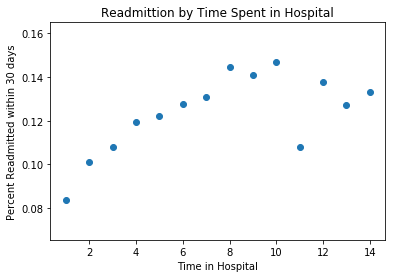

In [8]:
plt.scatter(perc_admitted['time_in_hospital'], perc_readmitted['readmit_perc'])
plt.ylabel('Percent Readmitted within 30 days')
plt.xlabel('Time in Hospital')
plt.title('Readmittion by Time Spent in Hospital')

## Readmission by Number of Medications